### Dataset ---> https://www.kaggle.com/ninzaami/loan-predication

# Loan Status prediction 8 Nov 2021

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno


In [33]:
dt = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
dt.isnull().sum()/dt.isnull().shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

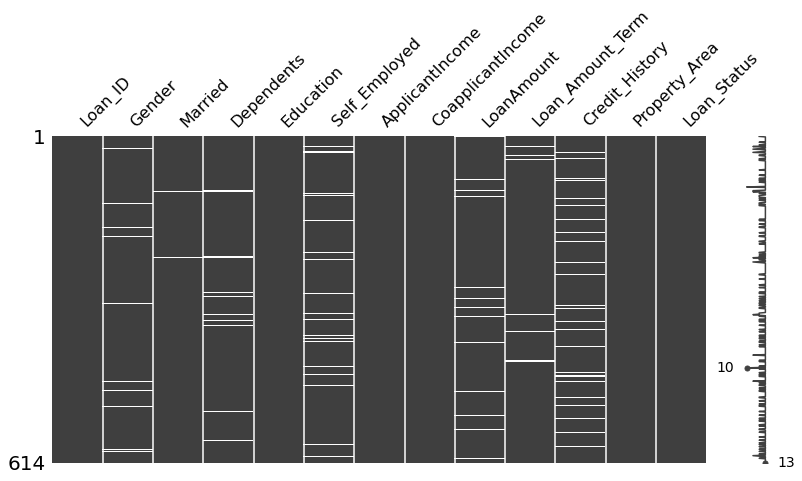

In [36]:
missingno.matrix(dt,  figsize = (13, 6))

### Dropping Missing values

In [37]:
dt = dt.dropna()

In [38]:
dt.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


### Data Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

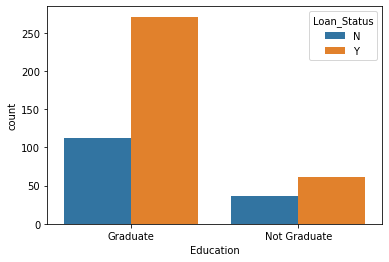

In [39]:
sb.countplot(x = 'Education', hue = 'Loan_Status', data= dt)

### Leable Encoding Load Status in 0  &  1

### Converting Catagorical Data to Numerical Data

In [40]:
dt.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [41]:
dt['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [42]:
dt['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [43]:
dt.replace({'Gender':{'Male':1 , 'Female':0 },
            'Married':{'Yes':1, 'No': 0},
            'Education':{'Graduate':1, 'Not Graduate': 0},
            'Self_Employed':{'Yes':1, 'No':0},
            'Loan_Status':{'N': 0, 'Y' : 1},
            'Property_Area':{'Urban':0, 'Semiurban':1, 'Rural':2}}, inplace =True)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
dt.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1


In [45]:
dt['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

### Dependent मे +3 है 

In [46]:
dt = dt.replace(to_replace = '3+', value = 4 )

In [47]:
dt['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [48]:
dt.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1


In [49]:
x = dt.iloc[:, 1:12]
y = dt['Loan_Status']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,  random_state=2)

# SVM

In [51]:
from sklearn.svm import SVC
svm_model = SVC()

In [52]:
svm_model.fit(x_train, y_train)

SVC()

In [53]:
svm_model.score(x_test, y_test)

0.6875

In [54]:
svm_model.score(x_train, y_train)

0.7013888888888888

# Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()

In [56]:
L_model.fit(x_train, y_train)
L_model.score(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8078703703703703

In [57]:
L_model.score(x_test, y_test)

0.8333333333333334

In [59]:
import pickle

pickle.dump(L_model, open('Loan_Pickel_file', 'wb'))

loaded_model = pickle.load(open('Loan_Pickel_file', 'rb'))

In [ ]:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

    
    
with open('model_pickle', 'rb') as f:
    mp= pickle.load(f)
    
    
mp.predict([x_test])    